In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = 20,10

labels = pd.Series({
    1: True,
    2: False,
    3: True,
    4: False,
    5: False,
    6: True,
    7: False,
    8: True,
    9: True,
    10: False,
    11: True,
    12: False,
    13: False,
    14: True,
    15: True,
    16: False
})

idx = list(range(1,17))

In [4]:
df = pd.read_csv('/home/manu/Downloads/Thesis - Form Responses - Form responses 1.csv')

df = df.iloc[:, [0]+[4,5,6,7,8]+list(range(14,len(df.columns)-12))]
df = df.replace(to_replace=['Strongly Agree', 'Agree', 'Undecided', 'Disagree', 'Strongly Disagree'], value=[5,4,3,2,1])
df = df.replace(to_replace=['Human', 'Computer'], value=[True, False])
df = df.replace(to_replace=[
    'I am a music lover and sometimes listen to jazz music',
    'I am not very familiar with jazz music',
    'I am a musician and/or a jazz enthusiast'
], value=['low', 'middle', 'high'])


rename_cols = {
    'Timestamp': 'timestamp',
    'What is your nationality?.1': 'nationality',
    'What is your age?.1': 'age',
    'What is your relationship with jazz music?.1': 'acquaintance',
    'Does the music in the clip above sound good overall?': 'q1',
    'Does the music in the clip above sound novel and interesting?': 'n1',
    'Do you think that the music in the clip above music has been improvised by a human or a computer?': 'h1'
}

for i in range(1, 16):
    rename_cols[f'Does the music in the clip above sound good overall?.{i}'] =  f'q{i+1}'
    rename_cols[f'Does the music in the clip above sound novel and interesting?.{i}'] = f'n{i+1}'
    rename_cols[f'Do you think that the music in the clip above music has been improvised by a human or a computer?.{i}'] = f'h{i+1}'

df = df.rename(columns=rename_cols)

/tmp/ipykernel_1569187/550813230.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  qscores = df.filter(regex=("q[0-9]*")).mean(axis=0)


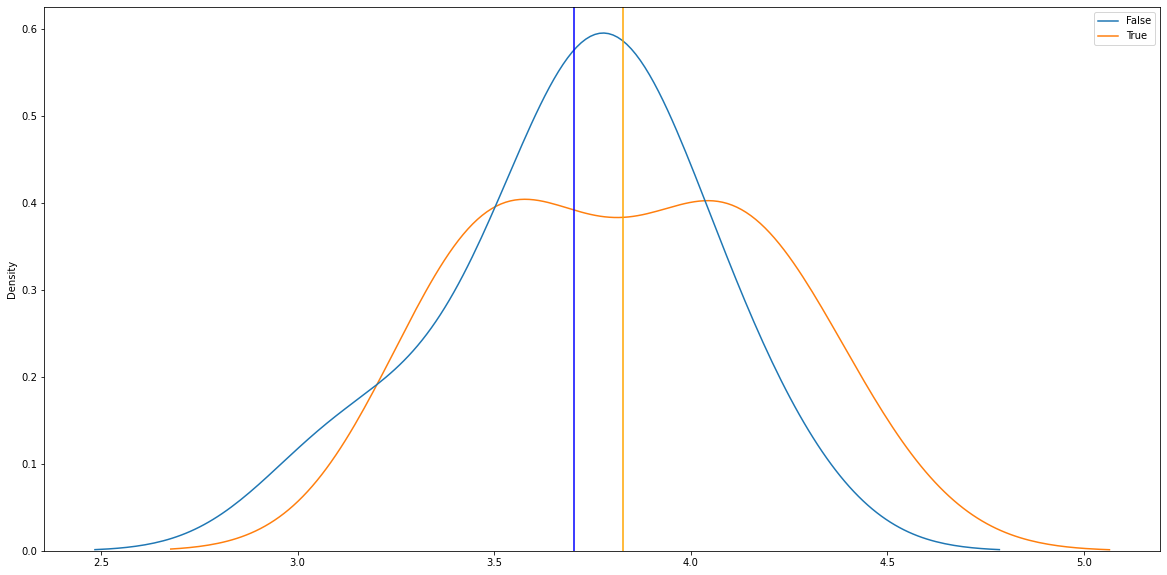

In [5]:
qscores = df.filter(regex=("q[0-9]*")).mean(axis=0)
qscores.index = idx
sns.kdeplot(x=qscores, hue=labels)
plt.axvline(x=qscores[labels].mean(), color='orange')
plt.axvline(x=qscores[~labels].mean(), color='blue')

In [6]:
nscores = df.filter(regex=("n[0-9]*")).mean(axis=0)
nscores.index = idx
# sns.kdeplot(x=nscores, hue=labels)
# plt.axvline(x=nscores[labels].mean(), color='orange')
# plt.axvline(x=nscores[~labels].mean(), color='blue')

/tmp/ipykernel_1569187/1063623646.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nscores = df.filter(regex=("n[0-9]*")).mean(axis=0)


/tmp/ipykernel_1569187/2599385920.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  voting = df.filter(regex=("q[0-9]*")).mean(axis=1)


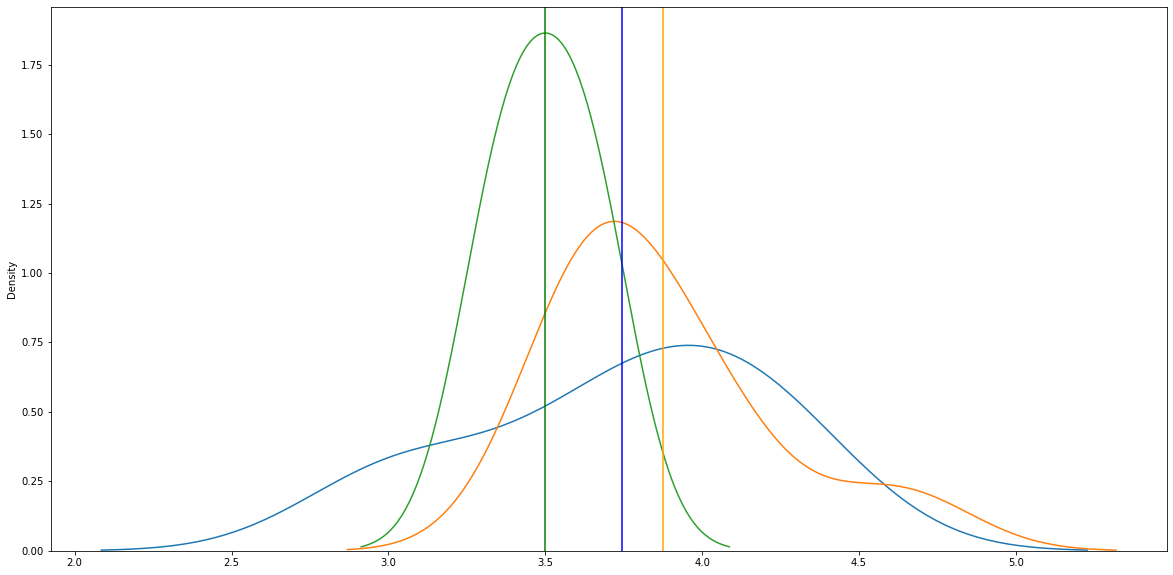

In [7]:
voting = df.filter(regex=("q[0-9]*")).mean(axis=1)
# sns.kdeplot(x=voting[df['acquaintance'] =='low'])
# sns.kdeplot(x=voting[df['acquaintance'] =='middle'])
# sns.kdeplot(x=voting[df['acquaintance'] =='high'])

# plt.axvline(x=voting[df['acquaintance'] == 'low'].mean(), color='blue')
# plt.axvline(x=voting[df['acquaintance'] == 'middle'].mean(), color='orange')
# plt.axvline(x=voting[df['acquaintance'] == 'high'].mean(), color='green')

In [128]:
nvoting = df.filter(regex=("n[0-9]*")).mean(axis=1)
# sns.kdeplot(x=nvoting[df['acquaintance'] =='low'])
# sns.kdeplot(x=nvoting[df['acquaintance'] =='middle'])
# sns.kdeplot(x=nvoting[df['acquaintance'] =='high'])

# plt.axvline(x=nvoting[df['acquaintance'] == 'low'].mean(), color='blue')
# plt.axvline(x=nvoting[df['acquaintance'] == 'middle'].mean(), color='orange')
# plt.axvline(x=nvoting[df['acquaintance'] == 'high'].mean(), color='green')

/tmp/ipykernel_1569187/1398436210.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nvoting = df.filter(regex=("n[0-9]*")).mean(axis=1)


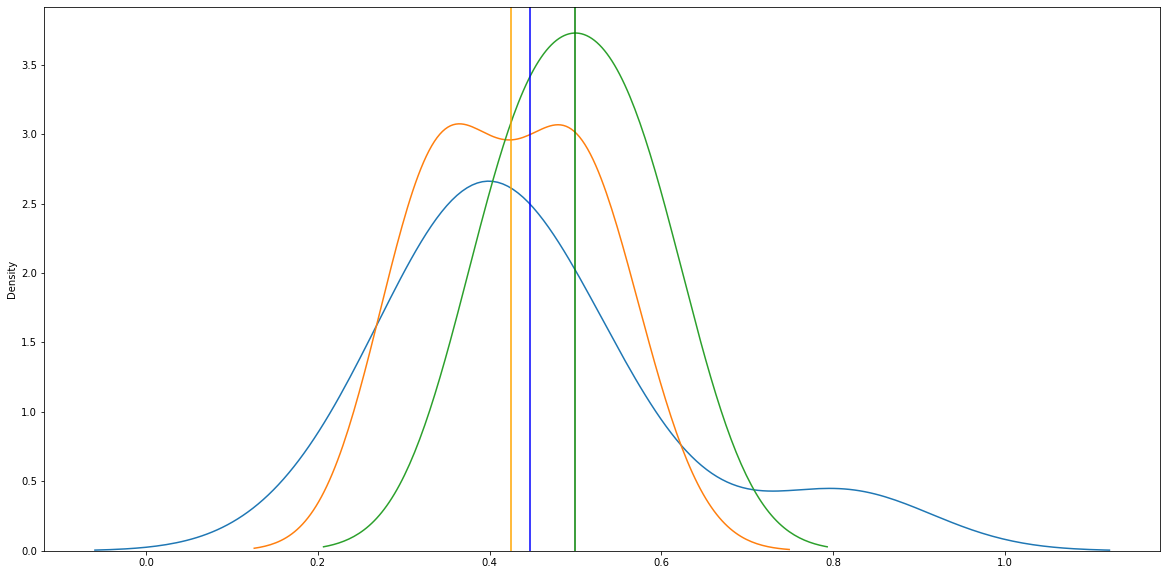

In [9]:
hvoting = df.filter(regex=("h[0-9]*")).mean(axis=1)
sns.kdeplot(x=hvoting[df['acquaintance'] =='low'])
sns.kdeplot(x=hvoting[df['acquaintance'] =='middle'])
sns.kdeplot(x=hvoting[df['acquaintance'] =='high'])

plt.axvline(x=hvoting[df['acquaintance'] == 'low'].mean(), color='blue')
plt.axvline(x=hvoting[df['acquaintance'] == 'middle'].mean(), color='orange')
plt.axvline(x=hvoting[df['acquaintance'] == 'high'].mean(), color='green')

In [10]:
turing = df.filter(regex='h[0-9]*').sum(axis=0)
turing.index = idx
human = turing[labels]
compu = turing[~labels]

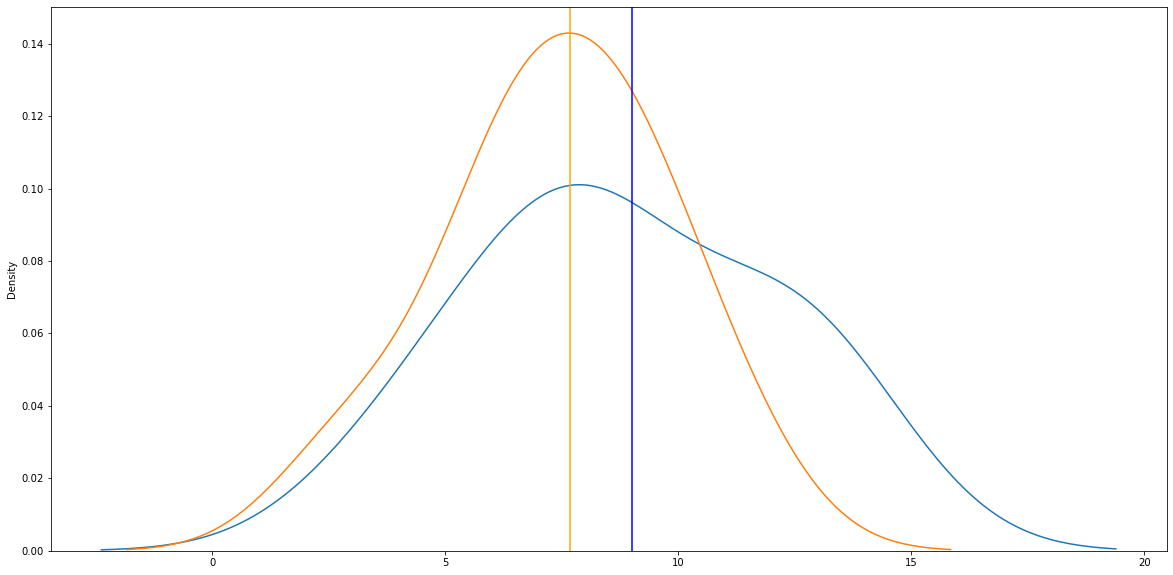

In [11]:
sns.kdeplot(human)
sns.kdeplot(compu)
plt.axvline(x=human[df['acquaintance'] == 'low'].mean(), color='blue')
plt.axvline(x=compu[df['acquaintance'] == 'middle'].mean(), color='orange')

<AxesSubplot:>

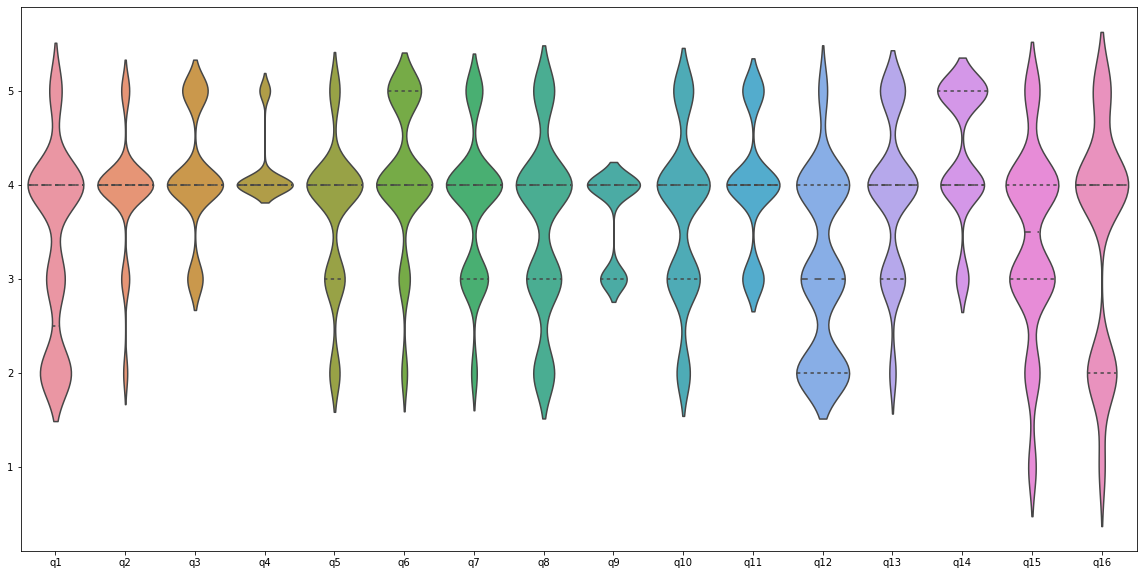

In [12]:
quality = df.filter(regex='q[0-9]*')

sns.violinplot(data=quality, scale="count", inner="quartile", bw=.25)

In [142]:
df.filter(regex='n[0-9]+', axis=1)

,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,n16
0,5,4,5,4,4,4,4,2,4.0,5.0,5.0,2.0,4.0,5.0,1.0,3.0
1,5,4,5,5,5,5,4,5,4.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0
2,3,2,4,3,3,3,2,3,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0
3,4,2,4,4,4,3,5,3,3.0,4.0,4.0,3.0,4.0,5.0,3.0,3.0
4,2,3,4,5,4,5,5,5,5.0,5.0,4.0,3.0,5.0,5.0,3.0,3.0
5,1,2,3,3,2,2,2,2,3.0,1.0,2.0,2.0,4.0,4.0,2.0,2.0
6,2,4,3,4,4,3,4,2,3.0,2.0,4.0,4.0,4.0,4.0,2.0,2.0
7,2,5,4,4,3,4,5,2,2.0,3.0,4.0,2.0,2.0,4.0,4.0,2.0
8,2,4,5,4,3,5,3,3,4.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0
9,4,4,4,3,5,5,2,2,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0


In [155]:
novel = df.filter(regex='n[0-9]+', axis=1)

sns.violinplot(x=novel.columns, y=novel.index, hue=labels, scale="count", inner="quartile", bw=.25)

ValueError: Grouper and axis must be same length

In [14]:
tur = df.filter(regex='h[0-9]*')
h = (tur.iloc[:, labels.values].sum(axis=0).sort_values()).reset_index(drop=True)
c = (tur.iloc[:, ~labels.values].sum(axis=0).sort_values()).reset_index(drop=True)
sns.ecdfplot(h)
sns.ecdfplot(c)

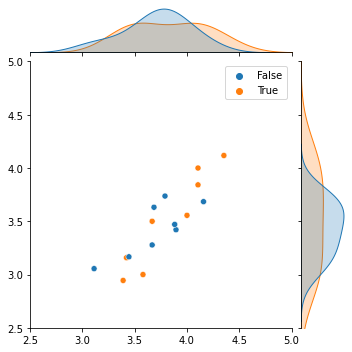

In [28]:
g = sns.jointplot(x=qscores, y=nscores,
                  hue=labels,
                  xlim=(2.5,5),
                  ylim=(2.5,5),
                  color="g", height=5)

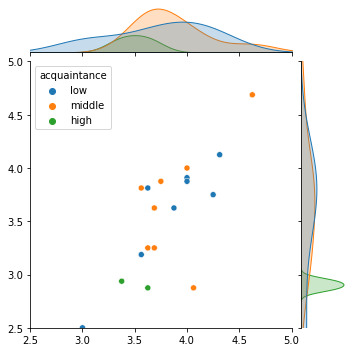

In [30]:
g = sns.jointplot(x=voting, y=nvoting,
                  hue=df['acquaintance'],
                  xlim=(2.5,5),
                  ylim=(2.5,5),
                  color="c", height=5)

In [130]:
q = pd.concat([
    pd.concat([qscores, pd.Series(index=range(1,17), data=np.repeat('q', 16)), labels],axis=1),
    pd.concat([nscores, pd.Series(index=range(1,17), data=np.repeat('n', 16)), labels],axis=1),
], axis=0).reset_index(drop=True)

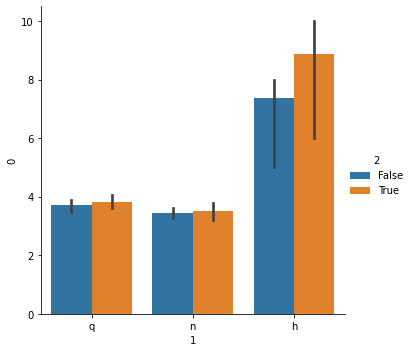

In [131]:
sns.catplot(data=q, x=1, y=0, hue=2, kind="bar")

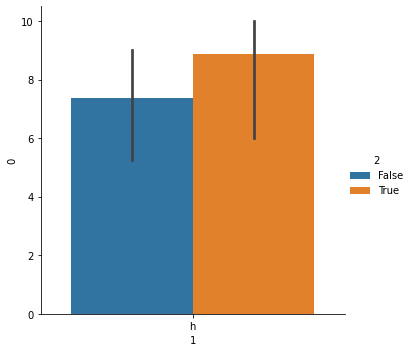

In [132]:
x = pd.concat([turing, pd.Series(index=range(1,17), data=np.repeat('h', 16)), labels],axis=1)
sns.catplot(data=x, x=1, y=0, hue=2, kind="bar")